# Assignment-3: k-Nearest Neighbour (kNN) on Iris Dataset

**Objective:** Implement and understand the k-NN classification algorithm using Python ML libraries.

Dataset: **Heart dataset**
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 🔹 Step 1: Import Libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Libraries imported.')

Libraries imported.


## 🔹 Step 2: Load  Dataset

In [6]:

df=pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


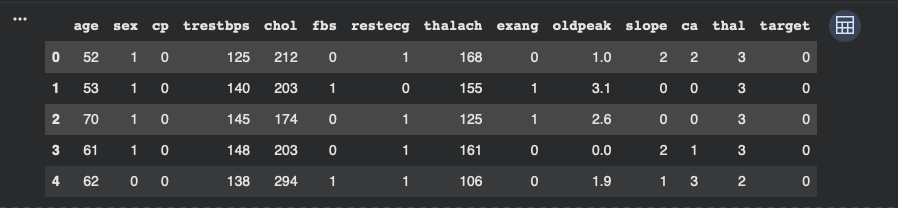

## 🔹 Step 3: Split Features and Target

In [7]:
# Features (all columns except target)
X = df.drop('target', axis=1)

# Target
y = df['target']
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1025, 13)
Target shape: (1025,)


## 🔹 Step 4: Train–Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% data for testing
    random_state=42,    # for reproducibility
    stratify=y          # keeps class balance (recommended for classification)
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (820, 13)
X_test shape: (205, 13)
y_train shape: (820,)
y_test shape: (205,)


## 🔹 Step 5: Build kNN Model (k = 5)

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Model trained.')

Model trained.


## 🔹 Step 6: Make Predictions

In [10]:
y_pred = knn.predict(X_test)
list(y_pred)[:10]

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0)]

## 🔹 Step 7: Show Correct and Wrong Predictions

In [11]:
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

results['Status'] = results.apply(lambda r: 'Correct' if r.Actual == r.Predicted else 'Wrong', axis=1)
results.head(20)

,Actual,Predicted,Status
0,0,0,Correct
1,1,0,Wrong
2,0,0,Correct
3,1,0,Wrong
4,0,0,Correct
5,0,0,Correct
6,1,1,Correct
7,0,0,Correct
8,1,1,Correct
9,1,0,Wrong


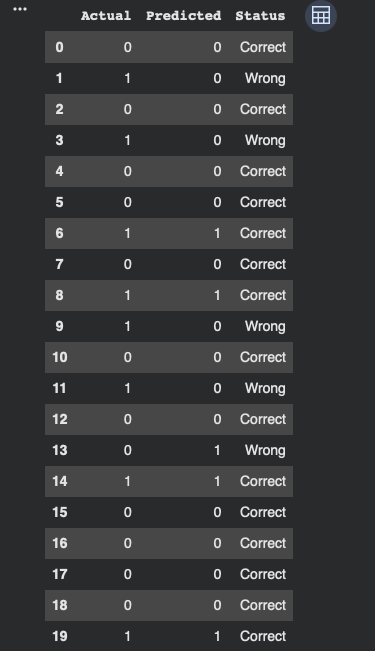

## 🔹 Step 8: Accuracy & Evaluation

In [12]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.697560975609756

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       100
           1       0.71      0.69      0.70       105

    accuracy                           0.70       205
   macro avg       0.70      0.70      0.70       205
weighted avg       0.70      0.70      0.70       205


Confusion Matrix:
[[71 29]
 [33 72]]


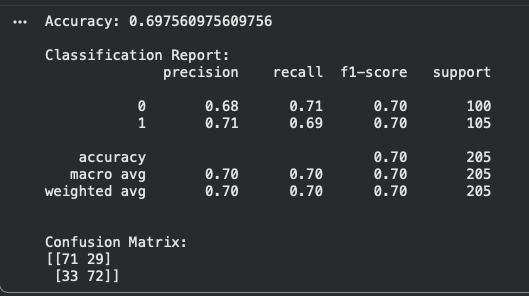

---
### ✔ Conclusion
The KNN algorithm with k = 5 was implemented successfully after encoding categorical variables and splitting the dataset into training and testing sets. Feature scaling was applied to improve distance calculation, and the model showed effective classification performance